In [1]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch.autograd.profiler as profiler
from scipy.constants import *
import time

from simulator import *
from utils import *
from physics import *

device = "cuda" if torch.cuda.is_available() else "cpu"
set_seed(2304)

ModuleNotFoundError: No module named 'simulator'

In [25]:
Lx, Ly = 1.0, 1.0
Nx, Ny = 32, 32
simulation_time = 1e-5  # tempo breve, interessa solo risolvere Poisson
dt = 1e-5
normalization = 1.0

# Istanzia lo spazio
sim = PlasmaTorch(
    Lx=Lx,
    Ly=Ly,
    Nx=Nx,
    Ny=Ny,
    simulation_time=simulation_time,
    dt=dt,
    normalization=normalization,
    boundaries_type="periodic",  # Non è troppo importante per Poisson
    save_frequency=1,
)

In [26]:
# # Impostiamo un potenziale fisso (0) su tutto il perimetro:
# # Per semplicità, applichiamo un rettangolo che coincida con tutto il dominio
# sim.add_rectangle_object(
#     x_min=0, x_max=Lx, y_min=0, y_max=Ly,
#     solid=False,
#     type="reflecting",
#     potential=0.0  # Forziamo phi=0 al contorno
# )

In [27]:
# Creiamo una specie di particelle per generare densità uniforme
# In alternativa, potremmo "spalmare" carica direttamente sulla griglia,
# ma usiamo le funzioni esistenti per coerenza col codice PIC
num_particles = 10_000
sim.create_new_specie(
    name="carica_uniforme",
    num_particles=num_particles,
    distribution="zero",
    disposition="random",
    mass=1.0,
    charge=1.0,
)

In [28]:
# Eseguiamo un solo step, giusto per risolvere Poisson
sim.update()

# Osserviamo il potenziale
potential = sim.grid[:, :, 1].cpu().numpy()
print("Potenziale risolto dal solver Poisson (estratto di 5 valori):")
print(potential.ravel()[:5])

Potenziale risolto dal solver Poisson (estratto di 5 valori):
[0. 0. 0. 0. 0.]


c:\Users\Marco\Desktop\PlasmaTorch\helper.py:87: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  time_slider = Slider(ax_slider, "Time", 0, len(grid_chronology) - 1, valinit=0, valstep=1)


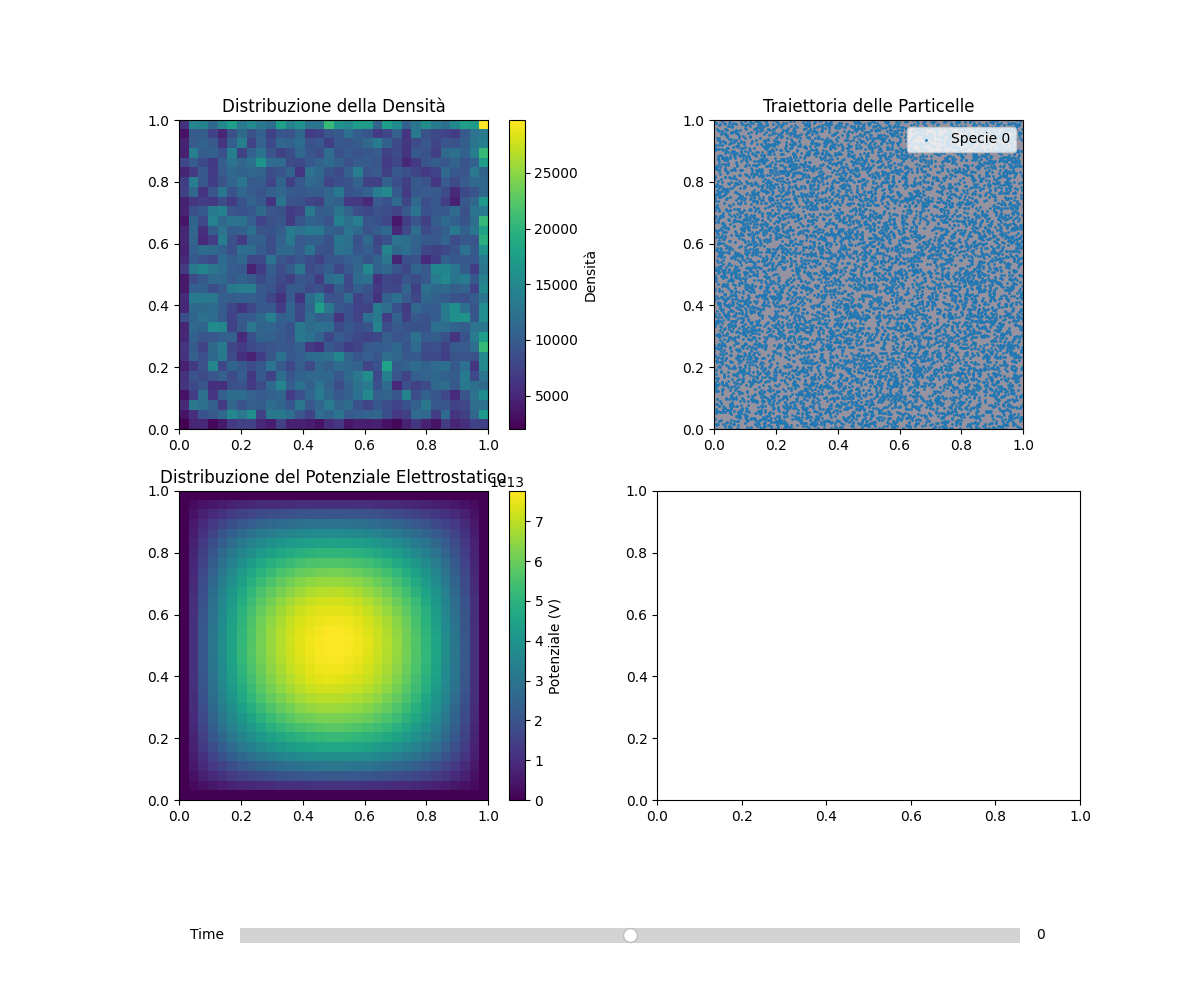

In [29]:
%matplotlib widget
particles_position_chronology = sim.particles_position_chronology
particles_velocity_chronology = sim.particles_velocity_chronology
fields_chronology = sim.fields_chronology
grid_chronology = sim.grid_chronology
particles_specie_chronology = sim.particles_specie_chronology
kinetic_energy_chronology = sim.kinetic_energy_chronology
potential_energy_chronology = sim.potential_energy_chronology
mechanic_energy_chronology = sim.mechanic_energy_chronology
particles_position_chronology = torch.stack(particles_position_chronology).cpu().numpy()
particles_velocity_chronology = torch.stack(particles_velocity_chronology).cpu().numpy()
fields_chronology = torch.stack(fields_chronology).cpu().numpy()
grid_chronology = torch.stack(grid_chronology).cpu().numpy()
particles_specie_chronology = torch.stack(particles_specie_chronology).cpu().numpy()
kinetic_energy_chronology = np.array(kinetic_energy_chronology)
potential_energy_chronology = np.array(potential_energy_chronology)
mechanic_energy_chronology = np.array(mechanic_energy_chronology)



dynamic_slider(fields_chronology, grid_chronology, particles_position_chronology, particles_specie_chronology, Lx, Ly, sim.solid_mask.cpu().numpy(), sim.fixed_potential_value.cpu().numpy())